# 2. Simple Classification 

In [1]:
from keras.models import Sequential

C:\Users\CHANG\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [36]:
import tensorflow as tf
from tensorflow import keras


In [55]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

In [3]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [4]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


In [5]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)


In [6]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


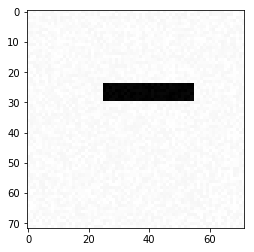

In [13]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')



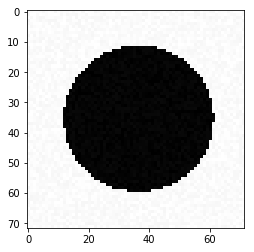

In [25]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')



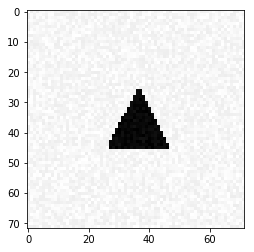

In [24]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
# why it becommes smaller and smaller?



In [8]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [11]:
import matplotlib.patches as patches


In [12]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



Generate the data

In [229]:
[X_train, Y_train] = generate_dataset_classification(2000, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


one-hot encode target column


check that target column has been converted

In [230]:
#one-hot encode target column
Y_train = to_categorical(Y_train, num_classes=3)

#vcheck that target column has been converted
Y_train[:3]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [231]:
Y_train.shape

(2000, 3)

In [236]:
[X_test, Y_test] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


vcheck that target column has been converted

In [237]:
Y_test = to_categorical(Y_test)


Y_test[:3]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [239]:
X_train.shape

(2000, 5184)

In [240]:
Y_train.shape

(2000, 3)

In [190]:
X_test.shape

(300, 5184)

In [238]:
Y_test.shape

(300, 3)

In [71]:
from keras.utils import to_categorical 


create model


get number of columns in training data

In [232]:
#create model
model_1 = Sequential()

#get number of columns in training data
n_cols_1 = X_train.shape[1]



In [233]:
#add layers to model
model_1.add(Dense(3, activation='softmax', input_shape=(n_cols_1,)))


compile model using accuracy to measure model performance

In [234]:
# model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [224]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)

In [235]:
#train model
model_1.fit(X_train, Y_train, epochs=300,  batch_size=32)

Epoch 1/300
2000/2000 [==============================] - 1s 371us/step - loss: 0.9397 - acc: 0.6440
Epoch 2/300
2000/2000 [==============================] - 0s 134us/step - loss: 0.2206 - acc: 0.9400
Epoch 3/300
2000/2000 [==============================] - 0s 137us/step - loss: 0.1197 - acc: 0.9935
Epoch 4/300
2000/2000 [==============================] - 0s 138us/step - loss: 0.0946 - acc: 0.9875
Epoch 5/300
2000/2000 [==============================] - 0s 140us/step - loss: 0.0563 - acc: 0.9995
Epoch 6/300
2000/2000 [==============================] - 0s 137us/step - loss: 0.0443 - acc: 1.0000
Epoch 7/300
2000/2000 [==============================] - 0s 138us/step - loss: 0.0342 - acc: 1.0000
Epoch 8/300
2000/2000 [==============================] - 0s 175us/step - loss: 0.0293 - acc: 1.0000
Epoch 9/300
2000/2000 [==============================] - 0s 154us/step - loss: 0.0250 - acc: 0.9995
Epoch 10/300
2000/2000 [==============================] - 0s 138us/step - loss: 0.0193 - acc: 1.0000

2000/2000 [==============================] - 0s 167us/step - loss: 2.6199e-05 - acc: 1.0000
Epoch 158/300
2000/2000 [==============================] - 0s 181us/step - loss: 2.5359e-05 - acc: 1.0000 0s - loss: 2.5861e-05 - acc: 
Epoch 159/300
2000/2000 [==============================] - 0s 156us/step - loss: 2.4544e-05 - acc: 1.0000
Epoch 160/300
2000/2000 [==============================] - 0s 140us/step - loss: 2.4083e-05 - acc: 1.0000
Epoch 161/300
2000/2000 [==============================] - 0s 143us/step - loss: 2.2989e-05 - acc: 1.0000
Epoch 162/300
2000/2000 [==============================] - 0s 144us/step - loss: 2.2166e-05 - acc: 1.0000
Epoch 163/300
2000/2000 [==============================] - 0s 138us/step - loss: 2.1666e-05 - acc: 1.0000
Epoch 164/300
2000/2000 [==============================] - 0s 131us/step - loss: 2.1095e-05 - acc: 1.0000
Epoch 165/300
2000/2000 [==============================] - 0s 130us/step - loss: 2.0379e-05 - acc: 1.0000
Epoch 166/300
2000/2000 [=====

In [241]:
test_y_predictions = model_1.predict(X_test)

In [242]:
test_y_predictions

array([[1.19752331e-12, 5.10520437e-15, 1.00000000e+00],
       [1.04968423e-10, 1.58620421e-02, 9.84137952e-01],
       [1.48142349e-11, 1.48066803e-07, 9.99999881e-01],
       [8.64440437e-07, 2.02552225e-10, 9.99999166e-01],
       [4.35028582e-08, 8.81442428e-01, 1.18557580e-01],
       [3.46635461e-01, 7.06342103e-13, 6.53364539e-01],
       [4.54226121e-13, 4.00341392e-12, 1.00000000e+00],
       [7.81971909e-09, 3.87521163e-02, 9.61247861e-01],
       [2.64468083e-11, 9.52412784e-01, 4.75871898e-02],
       [2.84928918e-01, 7.33054206e-02, 6.41765594e-01],
       [8.49337280e-01, 5.97328544e-02, 9.09298062e-02],
       [5.05667397e-10, 9.99999881e-01, 1.35436338e-07],
       [4.83408774e-04, 9.99516487e-01, 8.80292248e-08],
       [8.13617973e-08, 9.99999881e-01, 2.52267096e-10],
       [3.29005707e-05, 9.99962687e-01, 4.43858289e-06],
       [5.13820086e-16, 1.93798066e-25, 1.00000000e+00],
       [2.54408320e-07, 1.65023049e-03, 9.98349547e-01],
       [9.14753329e-10, 9.99601

In [244]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model_1.evaluate(X_test, Y_test)




Testing ------------
300/300 [==============================] - 0s 93us/step


In [149]:
print( model_1.predict(X_test)[0][0] )

0.31733817


In [245]:
# Saving the model
from keras.models import load_model
model_1.save("model_1.h5")

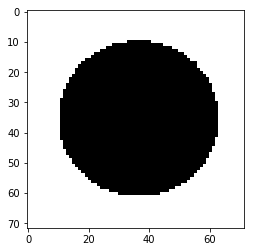

In [246]:
X_test = generate_a_disk()
plt.imshow(X_test.reshape(72, 72), cmap = "gray")

In [247]:
X_test = X_test.reshape(1, X_test.shape[0])

In [248]:
model_1.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

# 3. Visualization of the Solution

In [259]:
#Getting weights
W = model_1.get_weights()
#w10 = W1[:,0]
#w11 = W1[:,1]
#w12 = W1[:,2]
W1 = W[0]

(5184, 3)

In [261]:
import pandas as pd
W1_df = pd.DataFrame(W1)
rec = W1_df.iloc[:,0]
dick = W1_df.iloc[:,1]
tri = W1_df.iloc[:,2]

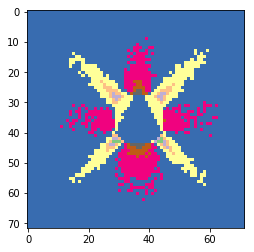

In [265]:
plt.imshow(rec.values.reshape(72,72), cmap='Accent')

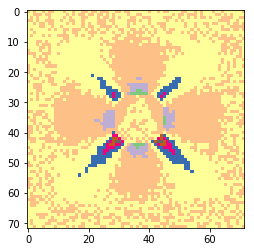

In [266]:
plt.imshow(dick.values.reshape(72,72), cmap='Accent')

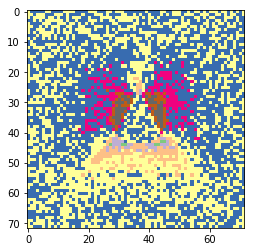

In [267]:
plt.imshow(tri.values.reshape(72,72), cmap='Accent')